In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import random
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import preprocessing
from math import ceil
from scipy.spatial.distance import euclidean as eu
import cv2

# Changing locations of Circles. 

First along x-axis and then along y-axis 

In [2]:
circles_x = []
circles_fft_x = []

circles_y = []
circles_fft_y = []

for a in range(4):
    arr = np.ones((10,10))
    cx = 3 + a
    cy = 5
    center_coordinates = (cx, cy) 
    radius = 3 
    print([cx, cy, radius])
    image = cv2.circle(arr, center_coordinates, radius, (0, 0, 0), -1) 
    
    im = image.reshape(100)
    fft = np.abs(np.fft.fft(im))
    
    circles_fft_x.append(fft)
    circles_x.append(im)
    
for a in range(4):
    arr = np.ones((10,10))
    cx = 5
    cy = 3 + a
    center_coordinates = (cx, cy) 
    radius = 3 
    print([cx, cy, radius])
    image = cv2.circle(arr, center_coordinates, radius, (0, 0, 0), -1) 
    
    im = image.reshape(100)
    fft = np.abs(np.fft.fft(im))
    
    circles_fft_y.append(fft)
    circles_y.append(im)

[3, 5, 3]
[4, 5, 3]
[5, 5, 3]
[6, 5, 3]
[5, 3, 3]
[5, 4, 3]
[5, 5, 3]
[5, 6, 3]


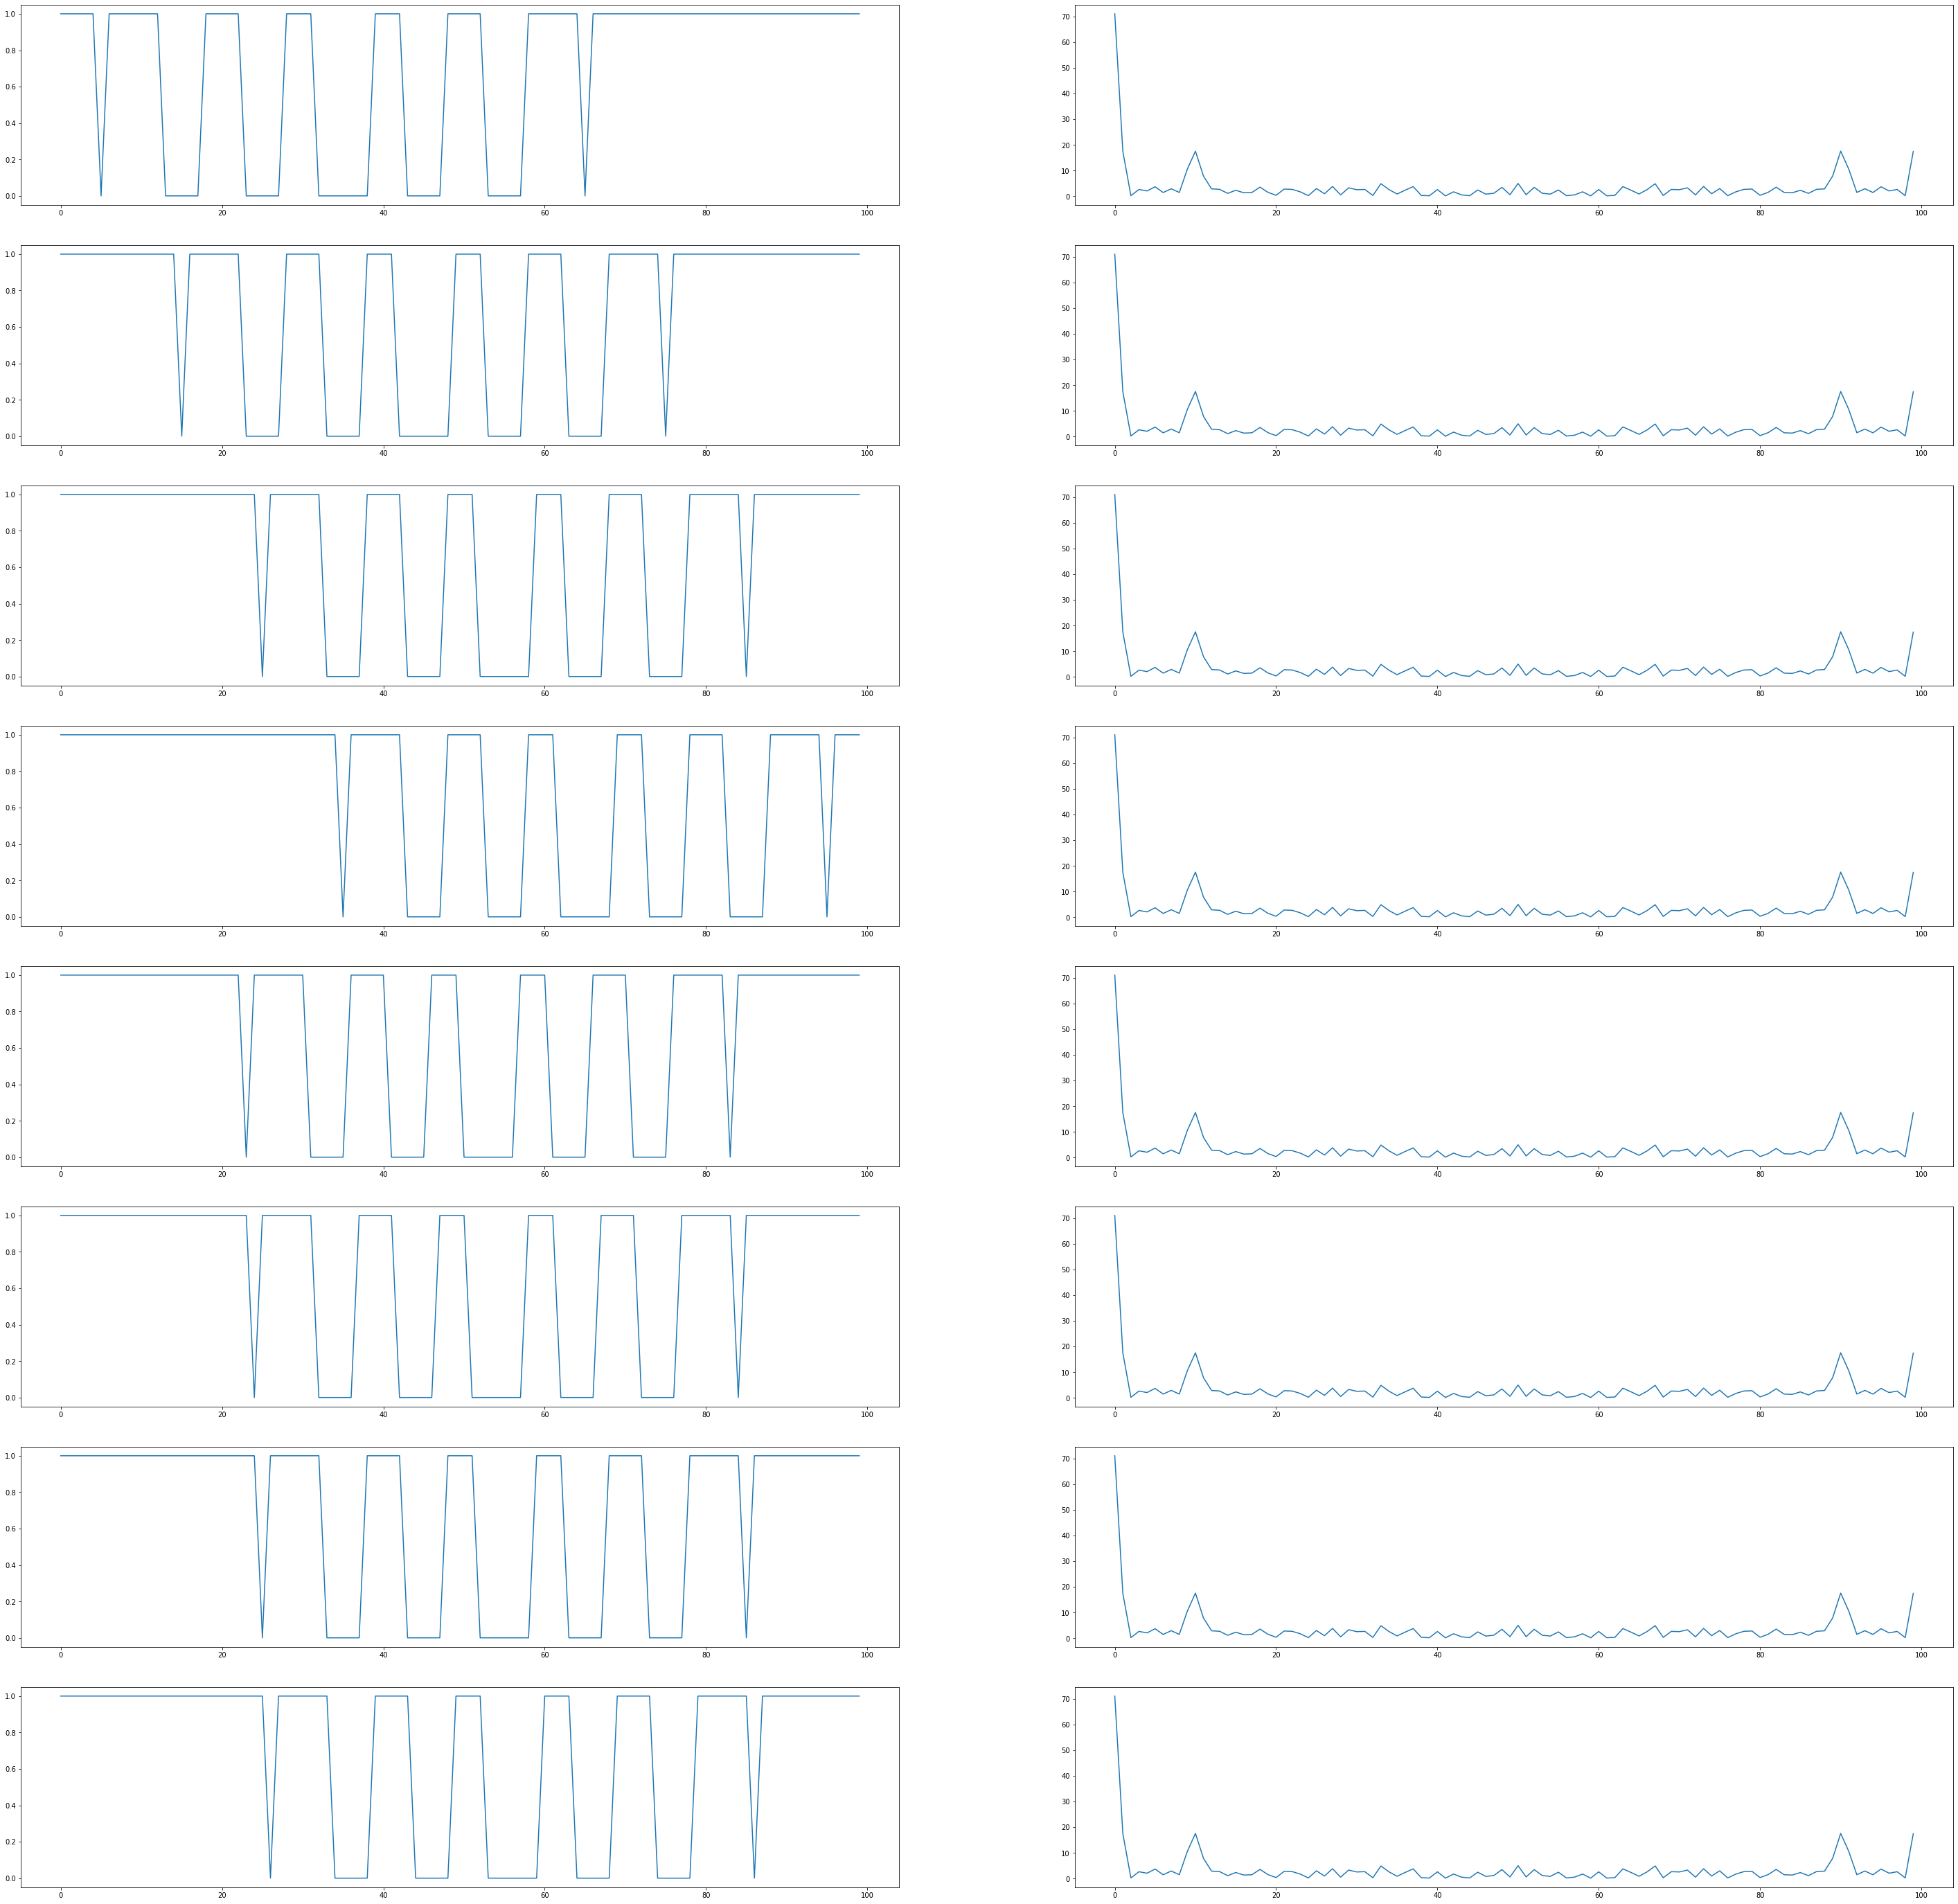

In [3]:
fig,ax =  plt.subplots(8,2,figsize=(50,50))
for a in range(4):
    ax[a][0].plot(range(100), circles_y[a])
    ax[a][1].plot(range(100), circles_fft_y[a])
    ax[4 + a][0].plot(range(100), circles_x[a])
    ax[4 + a][1].plot(range(100), circles_fft_x[a])
    
plt.show()

# Changing locations of Squares. 

First along x-axis and then along y-axis 

In [4]:
squares_fft_x = []
squares_fft_y = []
squares_x = []
squares_y = []

for a in range(4):
    arr = np.ones((10,10))
    tl = 1 + a
    br = 5 + a
    print([tl, 3], [br, 7])
    image = cv2.rectangle(arr, (tl, 3), (br, 7), (0, 0, 0), -1) 
    
    im = image.reshape(100)
    fft = np.abs(np.fft.fft(im))
    
    squares_fft_x.append(fft)
    squares_x.append(im)

for a in range(4):
    arr = np.ones((10,10))
    tl = 1 + a
    br = 5 + a
    print([3, tl], [7, br])
    image = cv2.rectangle(arr, (3, tl), (7, br), (0, 0, 0), -1) 
    
    im = image.reshape(100)
    fft = np.abs(np.fft.fft(im))
    
    squares_fft_y.append(fft)
    squares_y.append(im)


[1, 3] [5, 7]
[2, 3] [6, 7]
[3, 3] [7, 7]
[4, 3] [8, 7]
[3, 1] [7, 5]
[3, 2] [7, 6]
[3, 3] [7, 7]
[3, 4] [7, 8]


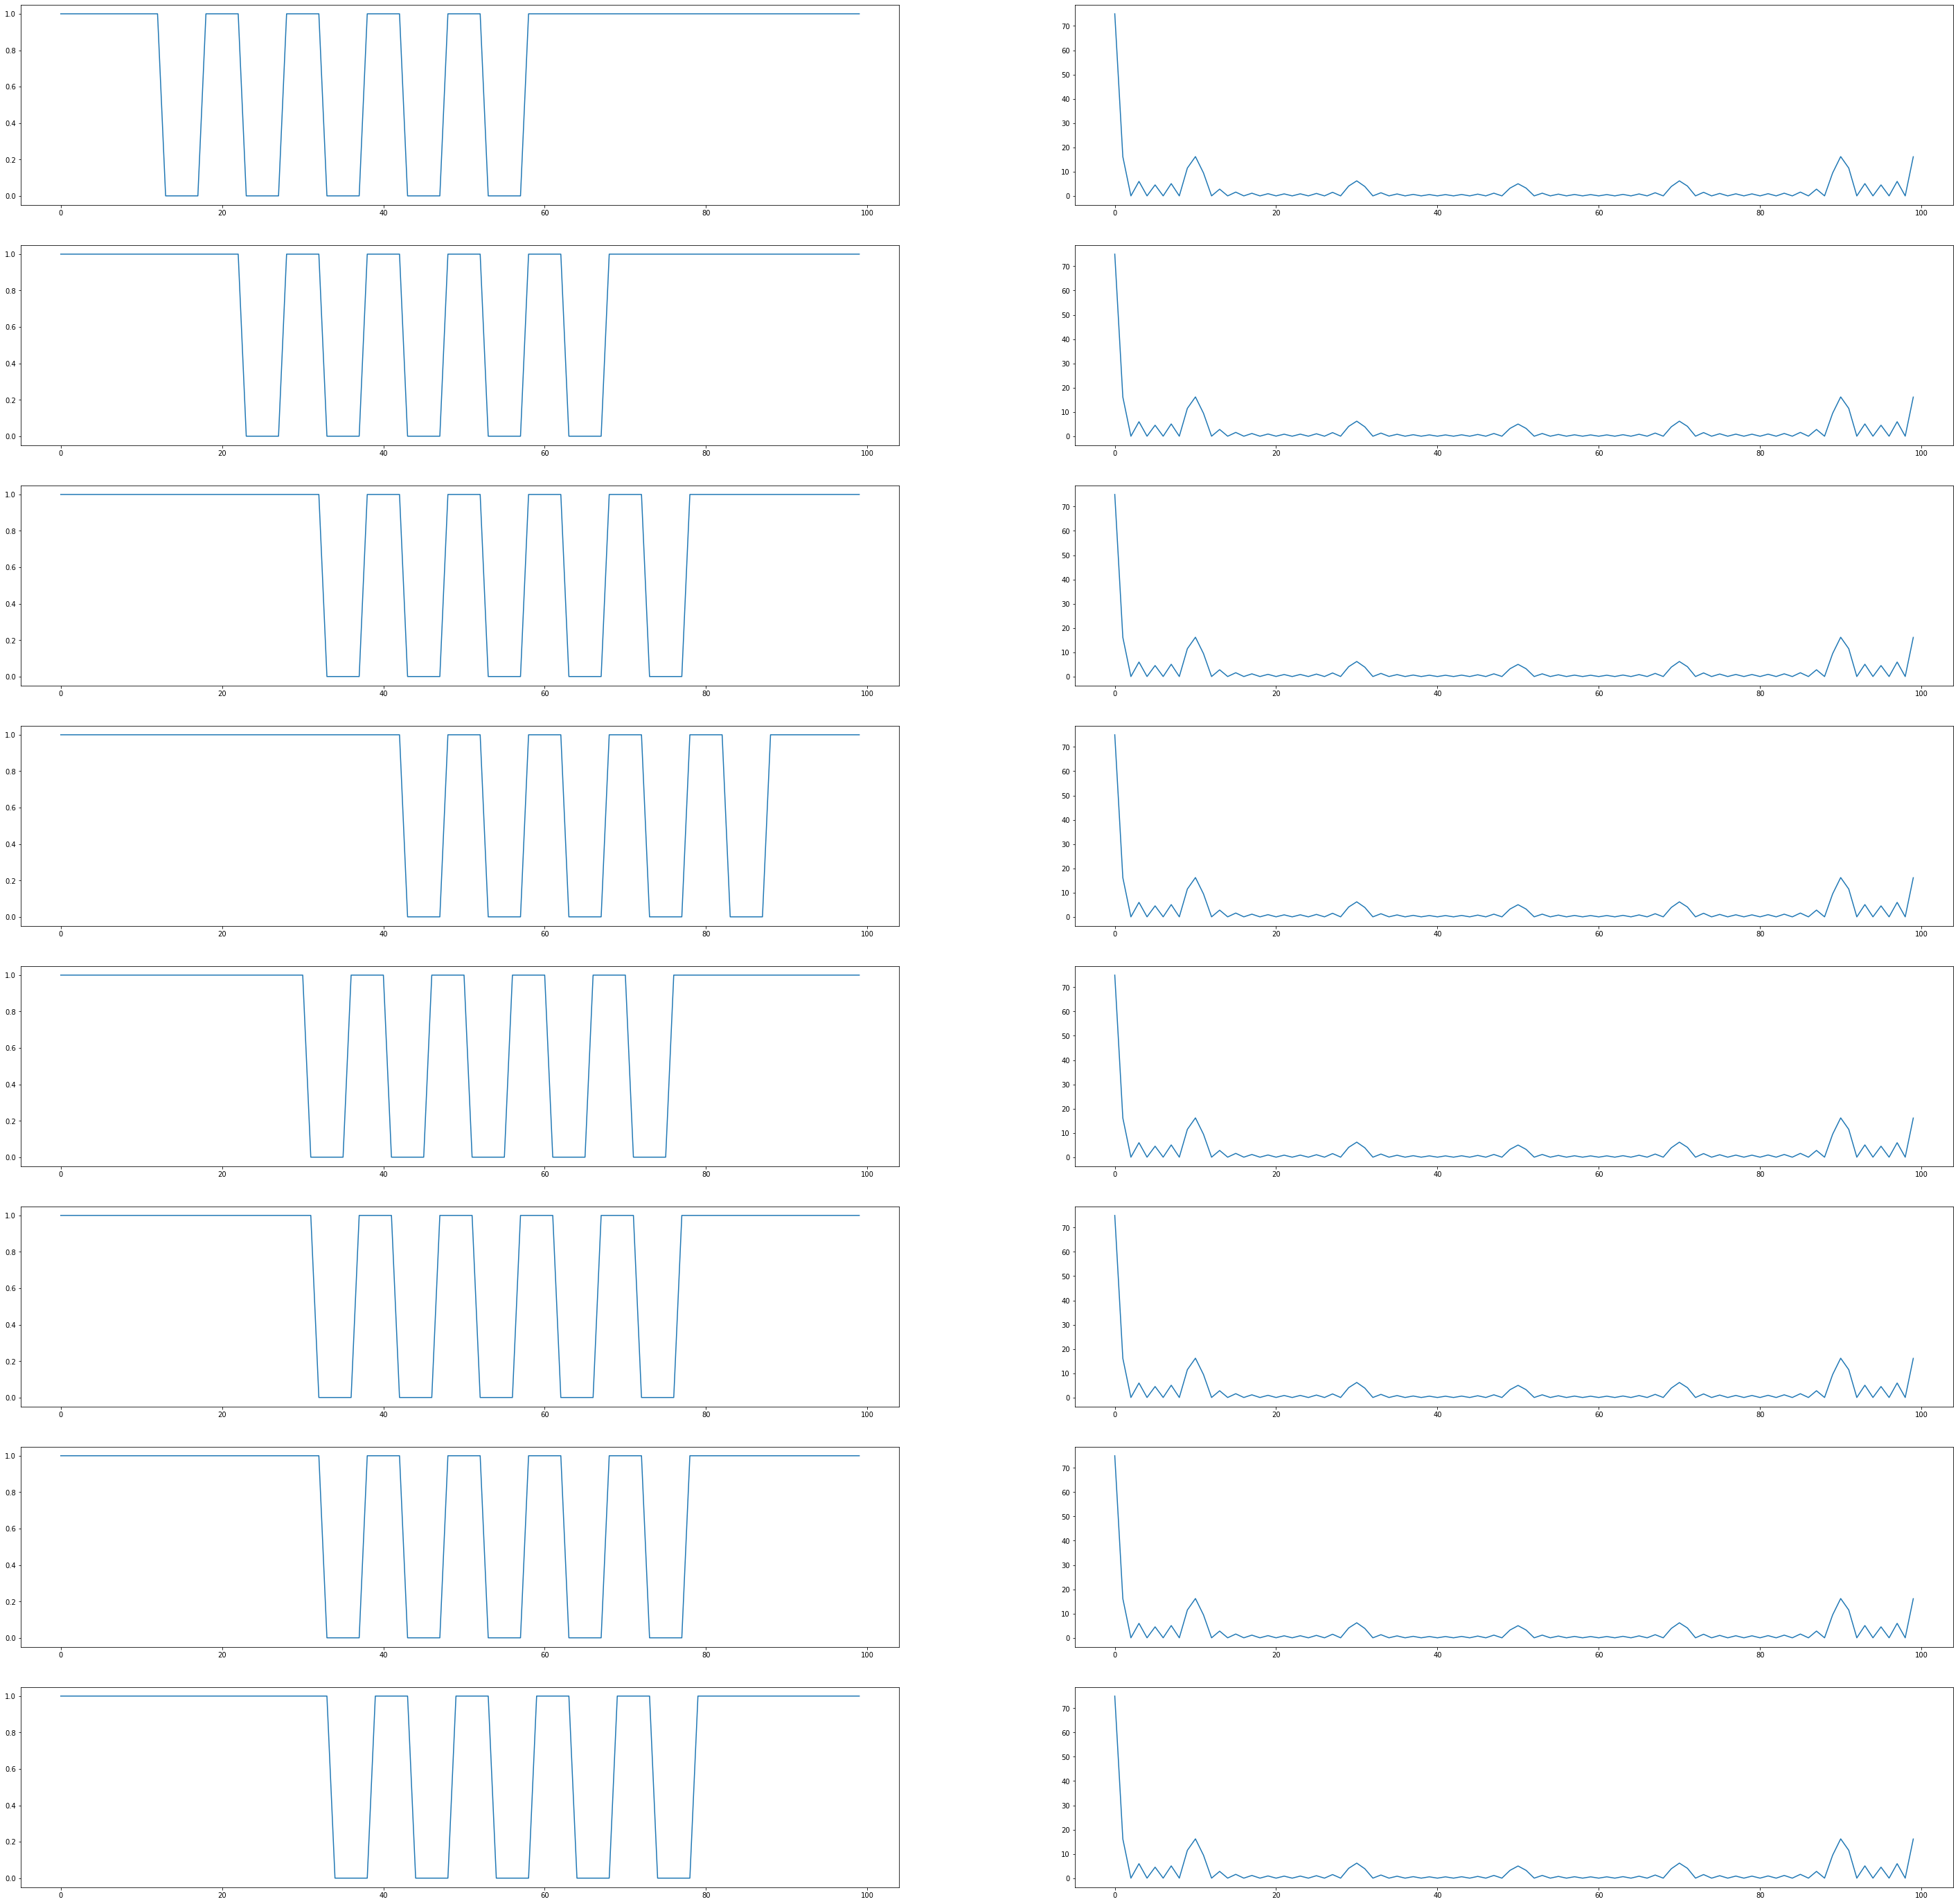

In [5]:
fig,ax =  plt.subplots(8,2,figsize=(50,50))
for a in range(4):
    ax[a][0].plot(range(100), squares_y[a])
    ax[a][1].plot(range(100), squares_fft_y[a])
    ax[4 + a][0].plot(range(100), squares_x[a])
    ax[4 + a][1].plot(range(100), squares_fft_x[a])
    
plt.show()

## Conclusion: 
Changing the location of the shapes on the images doesn't change the frequency spectrum of the image.

# Changing sizes of the Circles.  

In [6]:
circles_fft_s = []
circles_s = []
for a in range(4):
    arr = np.ones((10,10))
    cx = 5
    cy = 5
    center_coordinates = (cx, cy) 
    radius = 1 + a 
    print([cx, cy, radius])
    image = cv2.circle(arr, center_coordinates, radius, (0, 0, 0), -1) 
    
    im = image.reshape(100)
    fft = np.abs(np.fft.fft(im))
    
    circles_fft_s.append(fft)
    circles_s.append(im)

[5, 5, 1]
[5, 5, 2]
[5, 5, 3]
[5, 5, 4]


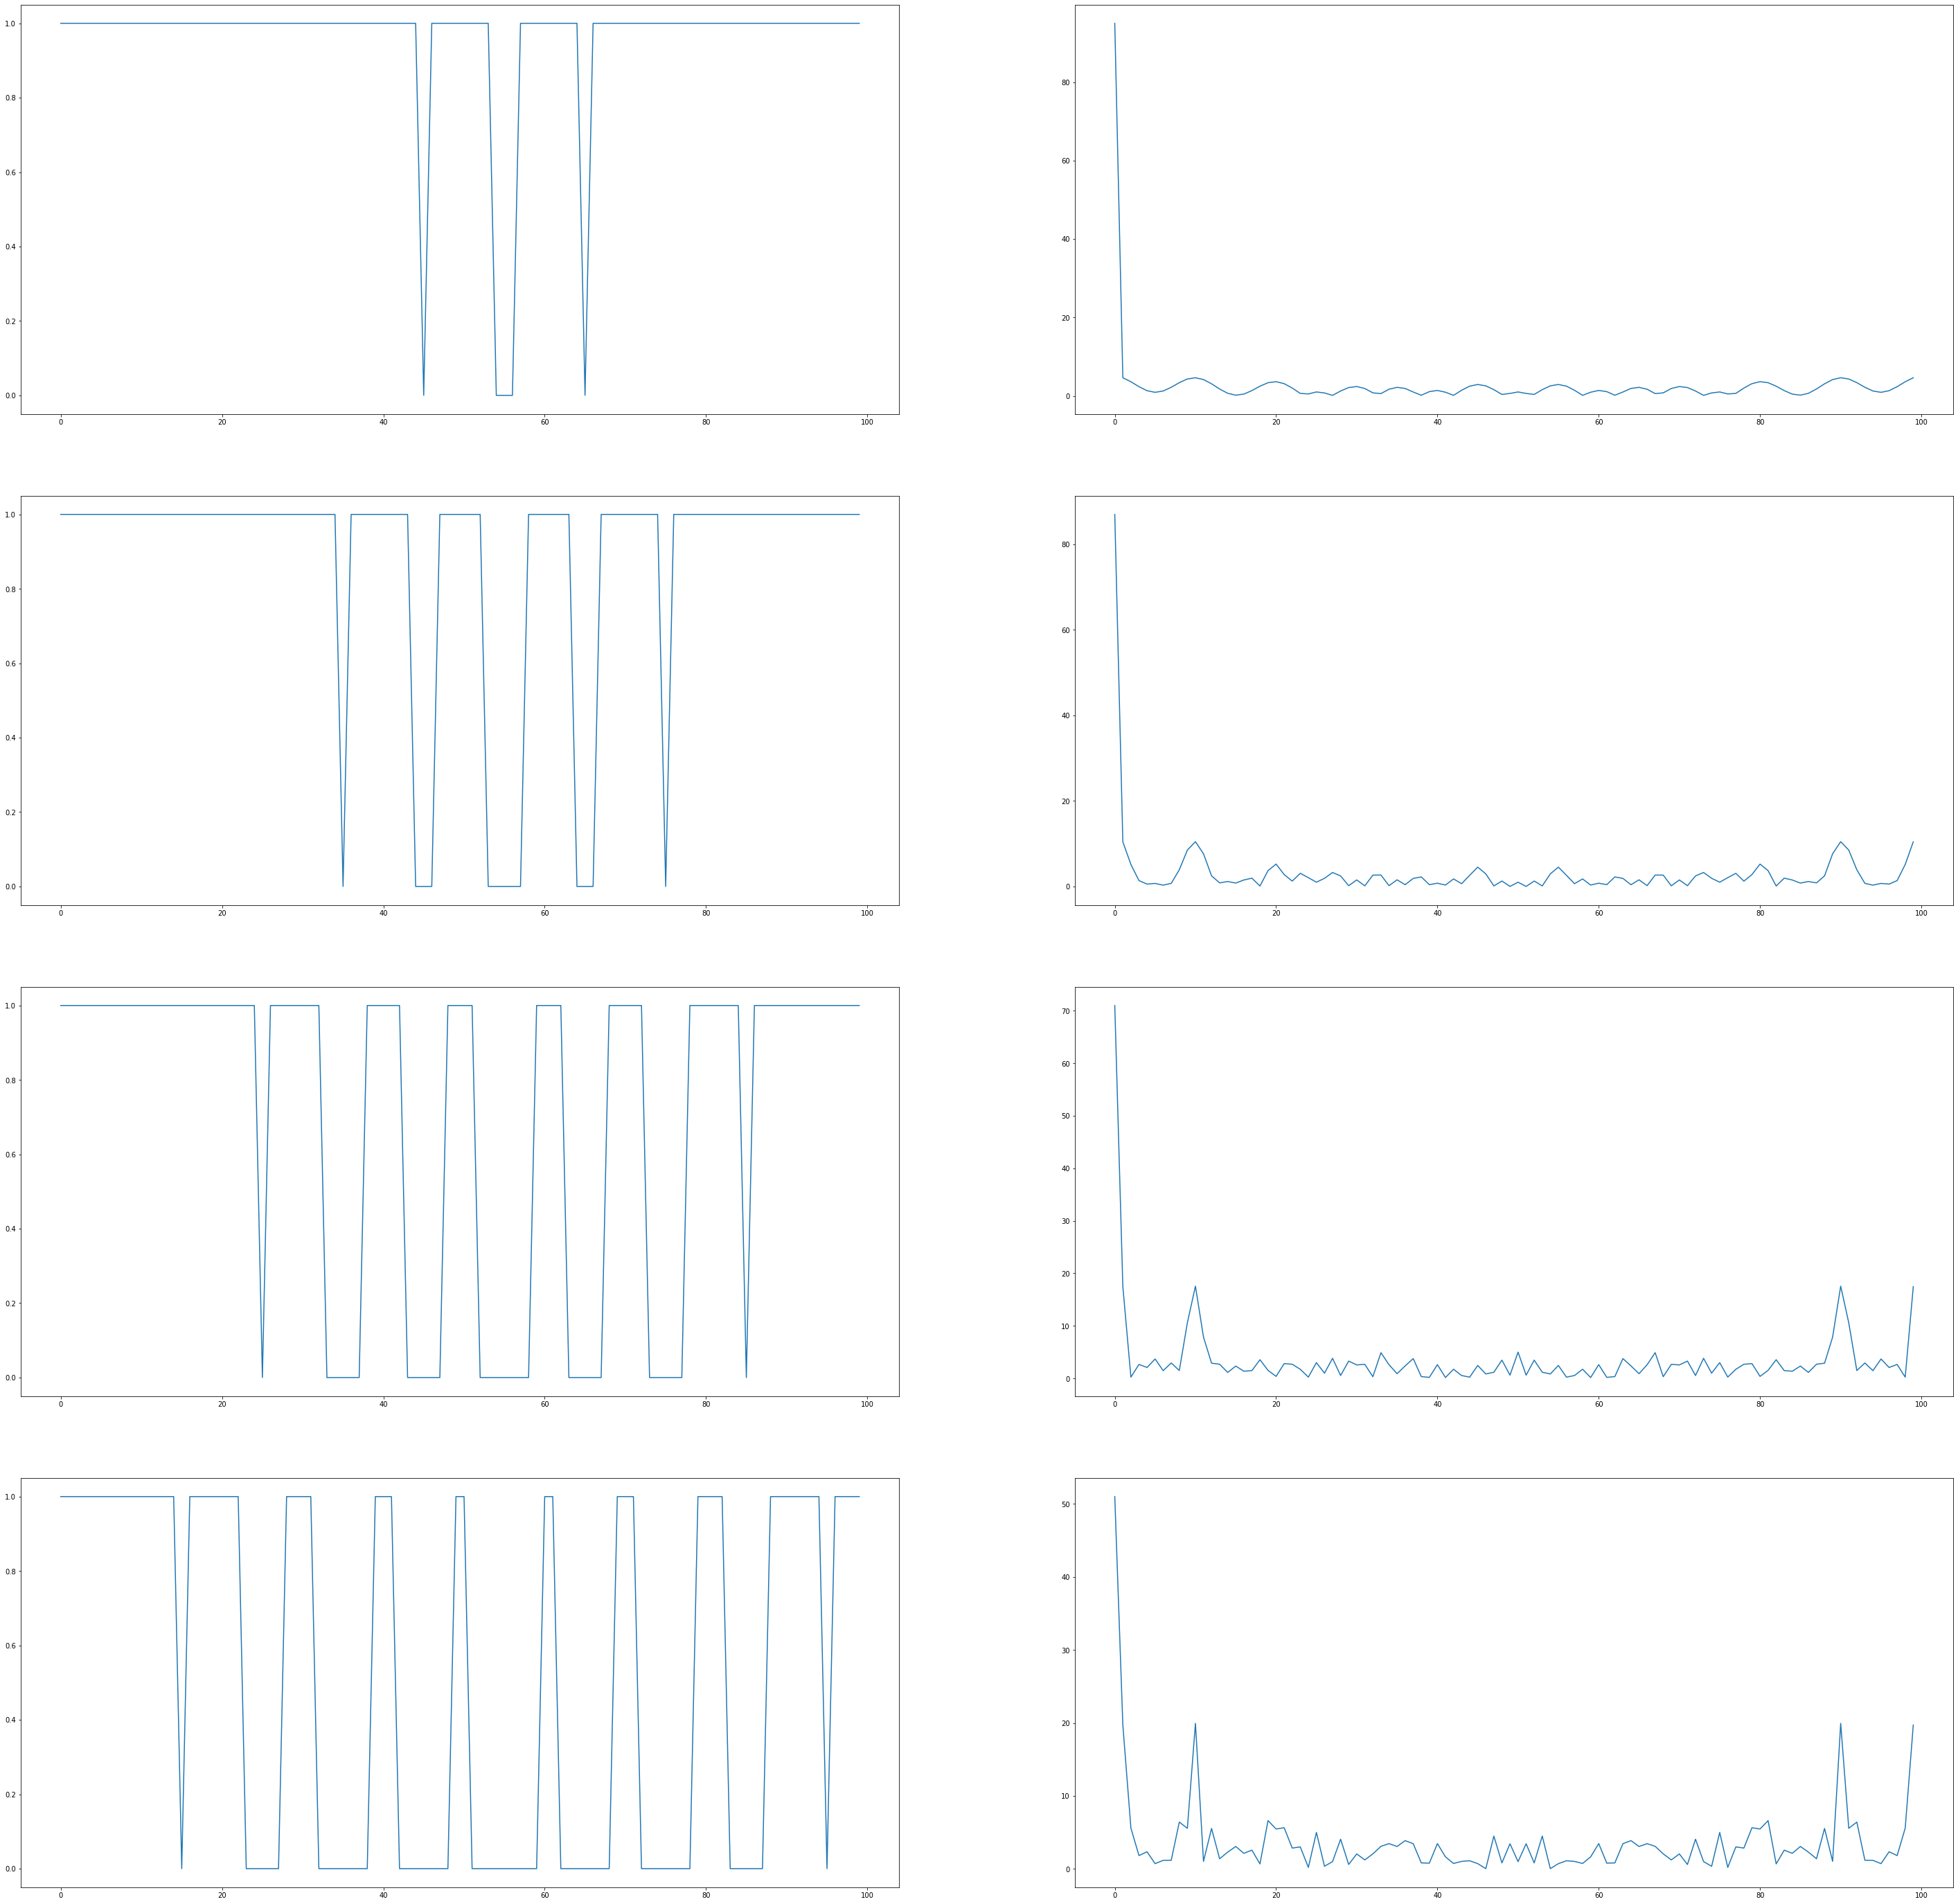

In [7]:
fig,ax =  plt.subplots(4,2,figsize=(50,50))
for a in range(4):
    ax[a][0].plot(range(100), circles_s[a])
    ax[a][1].plot(range(100), circles_fft_s[a])

# Changing sizes of the Squares. 

In [8]:
squares_fft_s = []
squares_s = []

for a in range(4):
    arr = np.ones((10,10))
    tl = 4 - a
    br = 6 + a
    print([tl, tl], [br, br])
    image = cv2.rectangle(arr, (tl, tl), (br, br), (0, 0, 0), -1) 
    im = image.reshape(100)
    fft = np.abs(np.fft.fft(im))
    
    squares_fft_s.append(fft)
    squares_s.append(im)

[4, 4] [6, 6]
[3, 3] [7, 7]
[2, 2] [8, 8]
[1, 1] [9, 9]


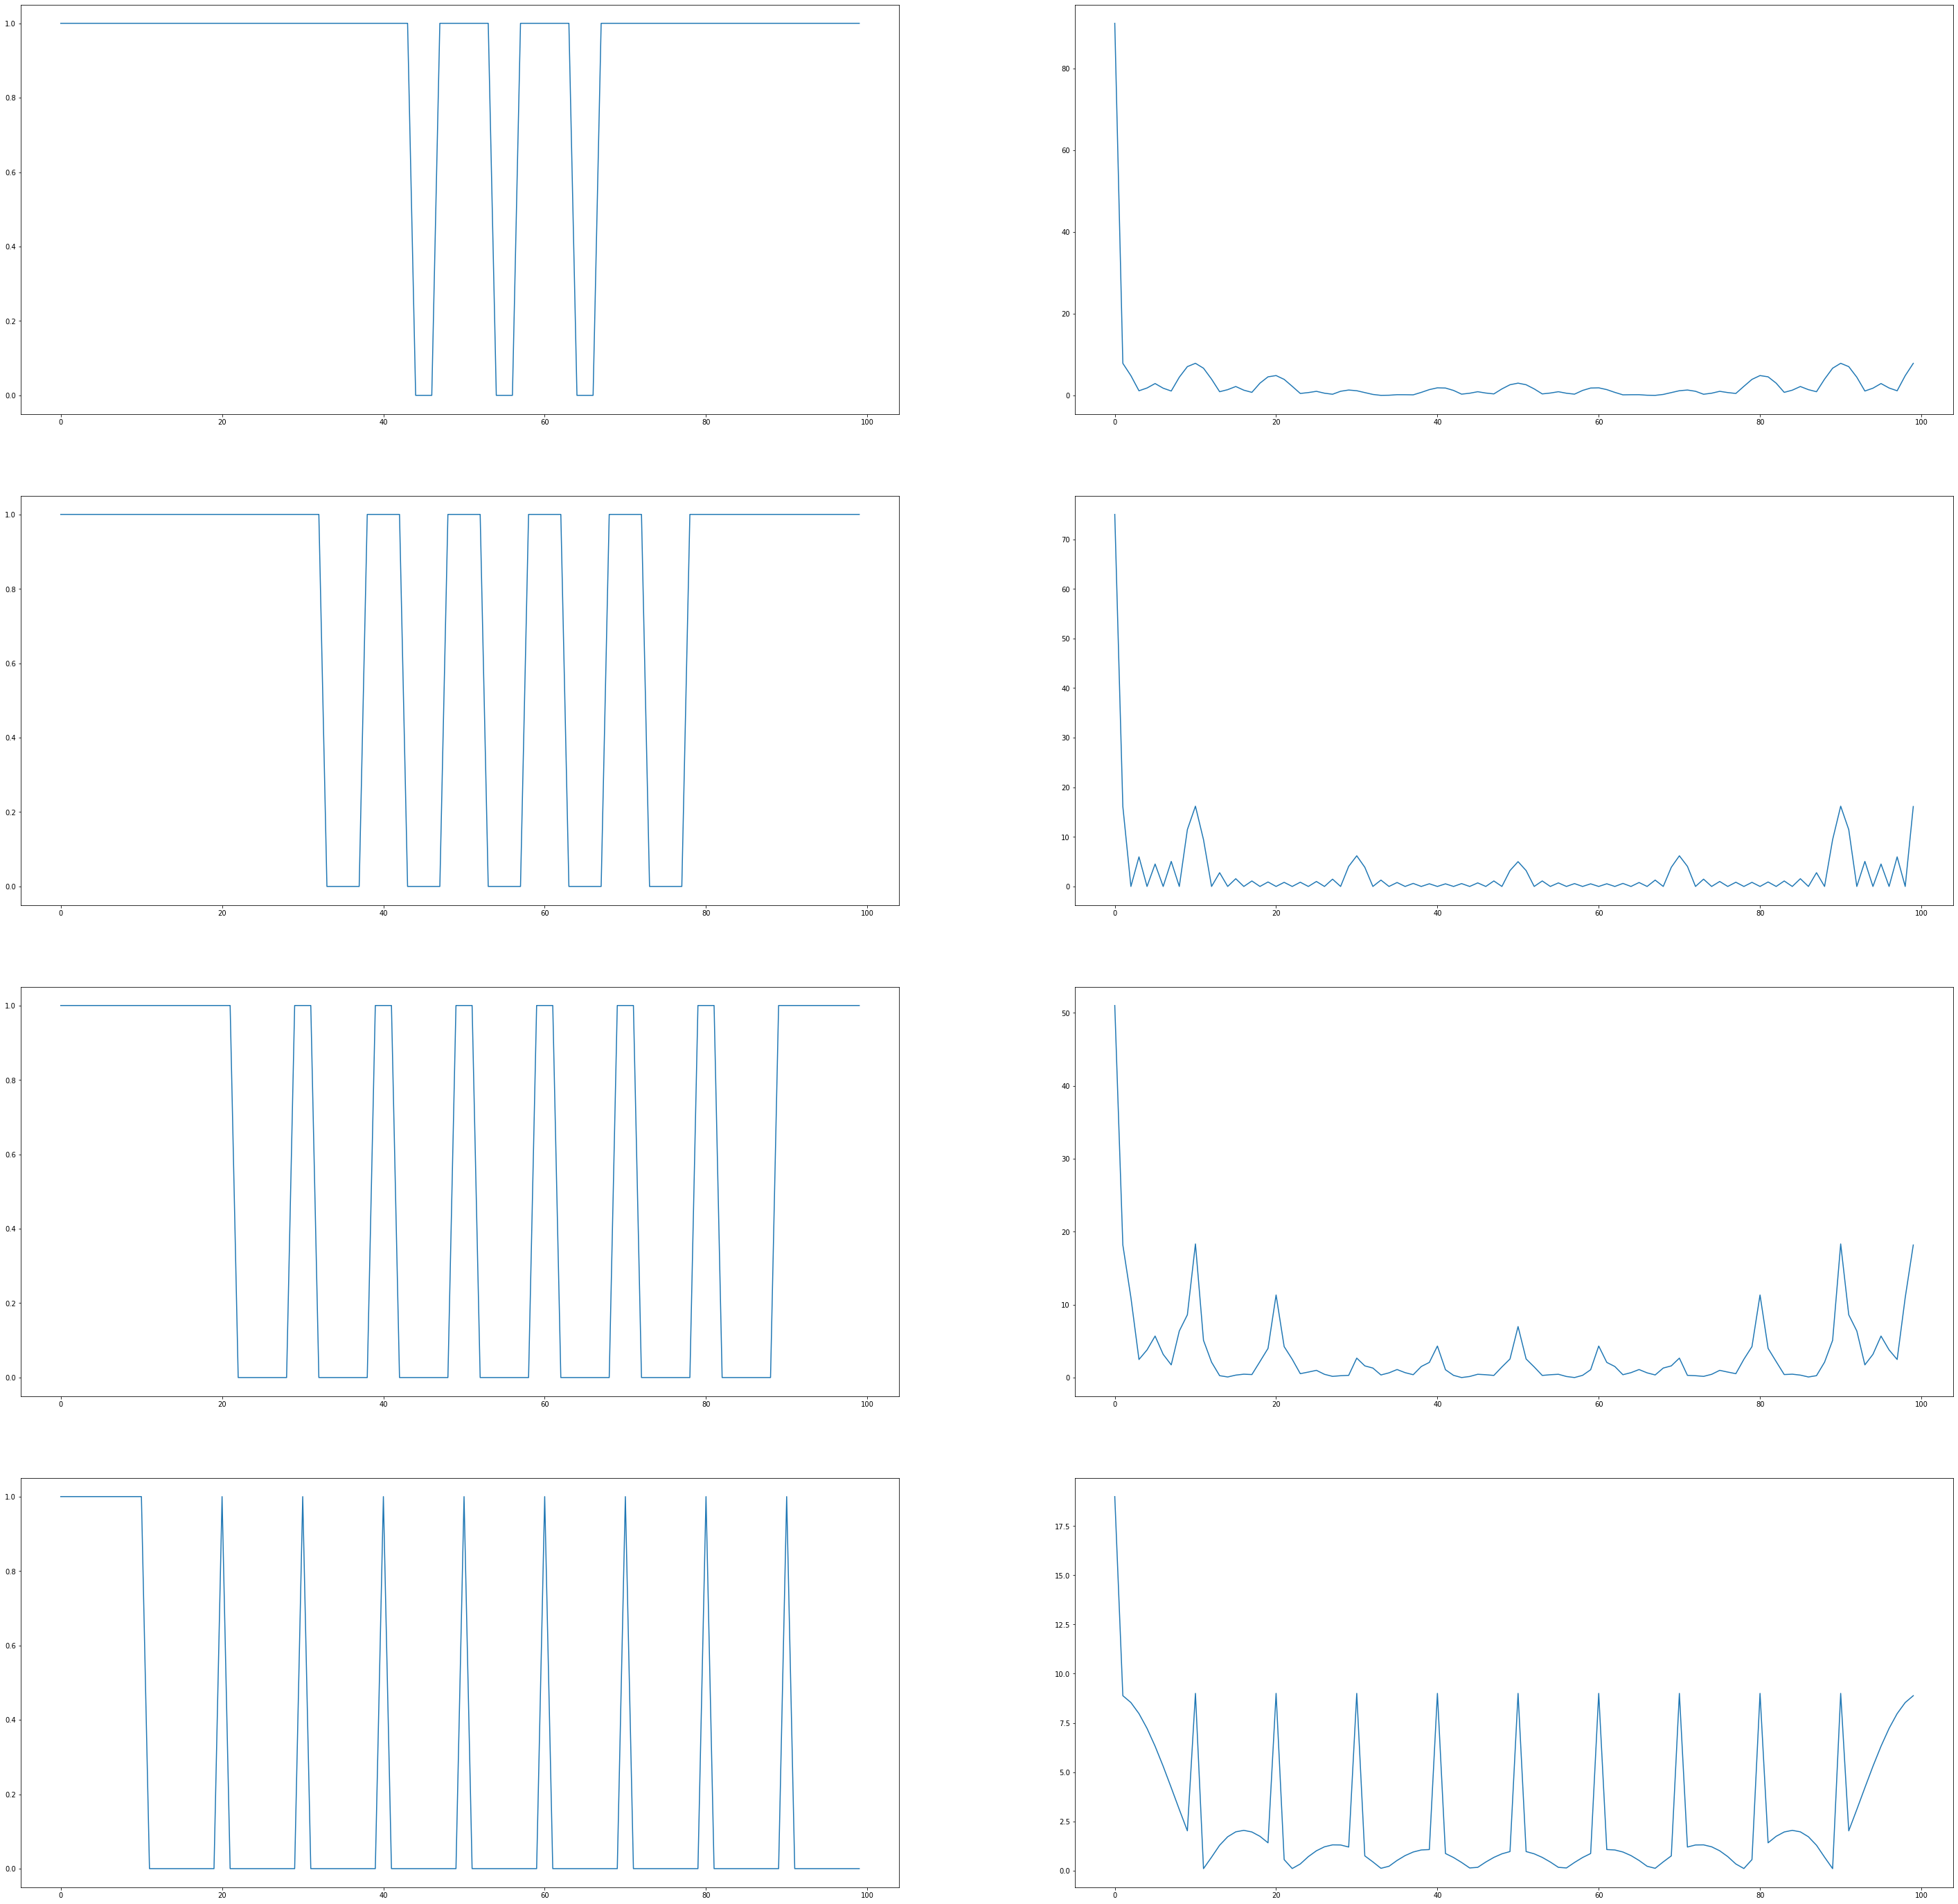

In [9]:
fig,ax =  plt.subplots(4,2,figsize=(50,50))
for a in range(4):
    ax[a][0].plot(range(100), squares_s[a])
    ax[a][1].plot(range(100), squares_fft_s[a])

## Conclusion:
The increase in size of the squares makes the spikes on the frequency spectrum more prominent. 

Squares appear more prominent in the frequency spectrum as compared to the circles

(might be because of the constant width for each line of the image)

## Changing the size of the potrait and keeping the size of the square same:

In [10]:
squares_fft_ss = []
squares_ss = []

for a in range(4):
    arr = np.ones(((a+3)*2, (a+3)*2))
    tl = a+1
    br = a+5
    print([tl, tl], [br, br], (a+3)*2)
    image = cv2.rectangle(arr, (tl, tl), (br, br), (0, 0, 0), -1) 
    im = image.reshape(((a+3)*2)**2)
    fft = np.abs(np.fft.fft(im))
    
    squares_fft_ss.append(fft)
    squares_ss.append(im)

[1, 1] [5, 5] 6
[2, 2] [6, 6] 8
[3, 3] [7, 7] 10
[4, 4] [8, 8] 12


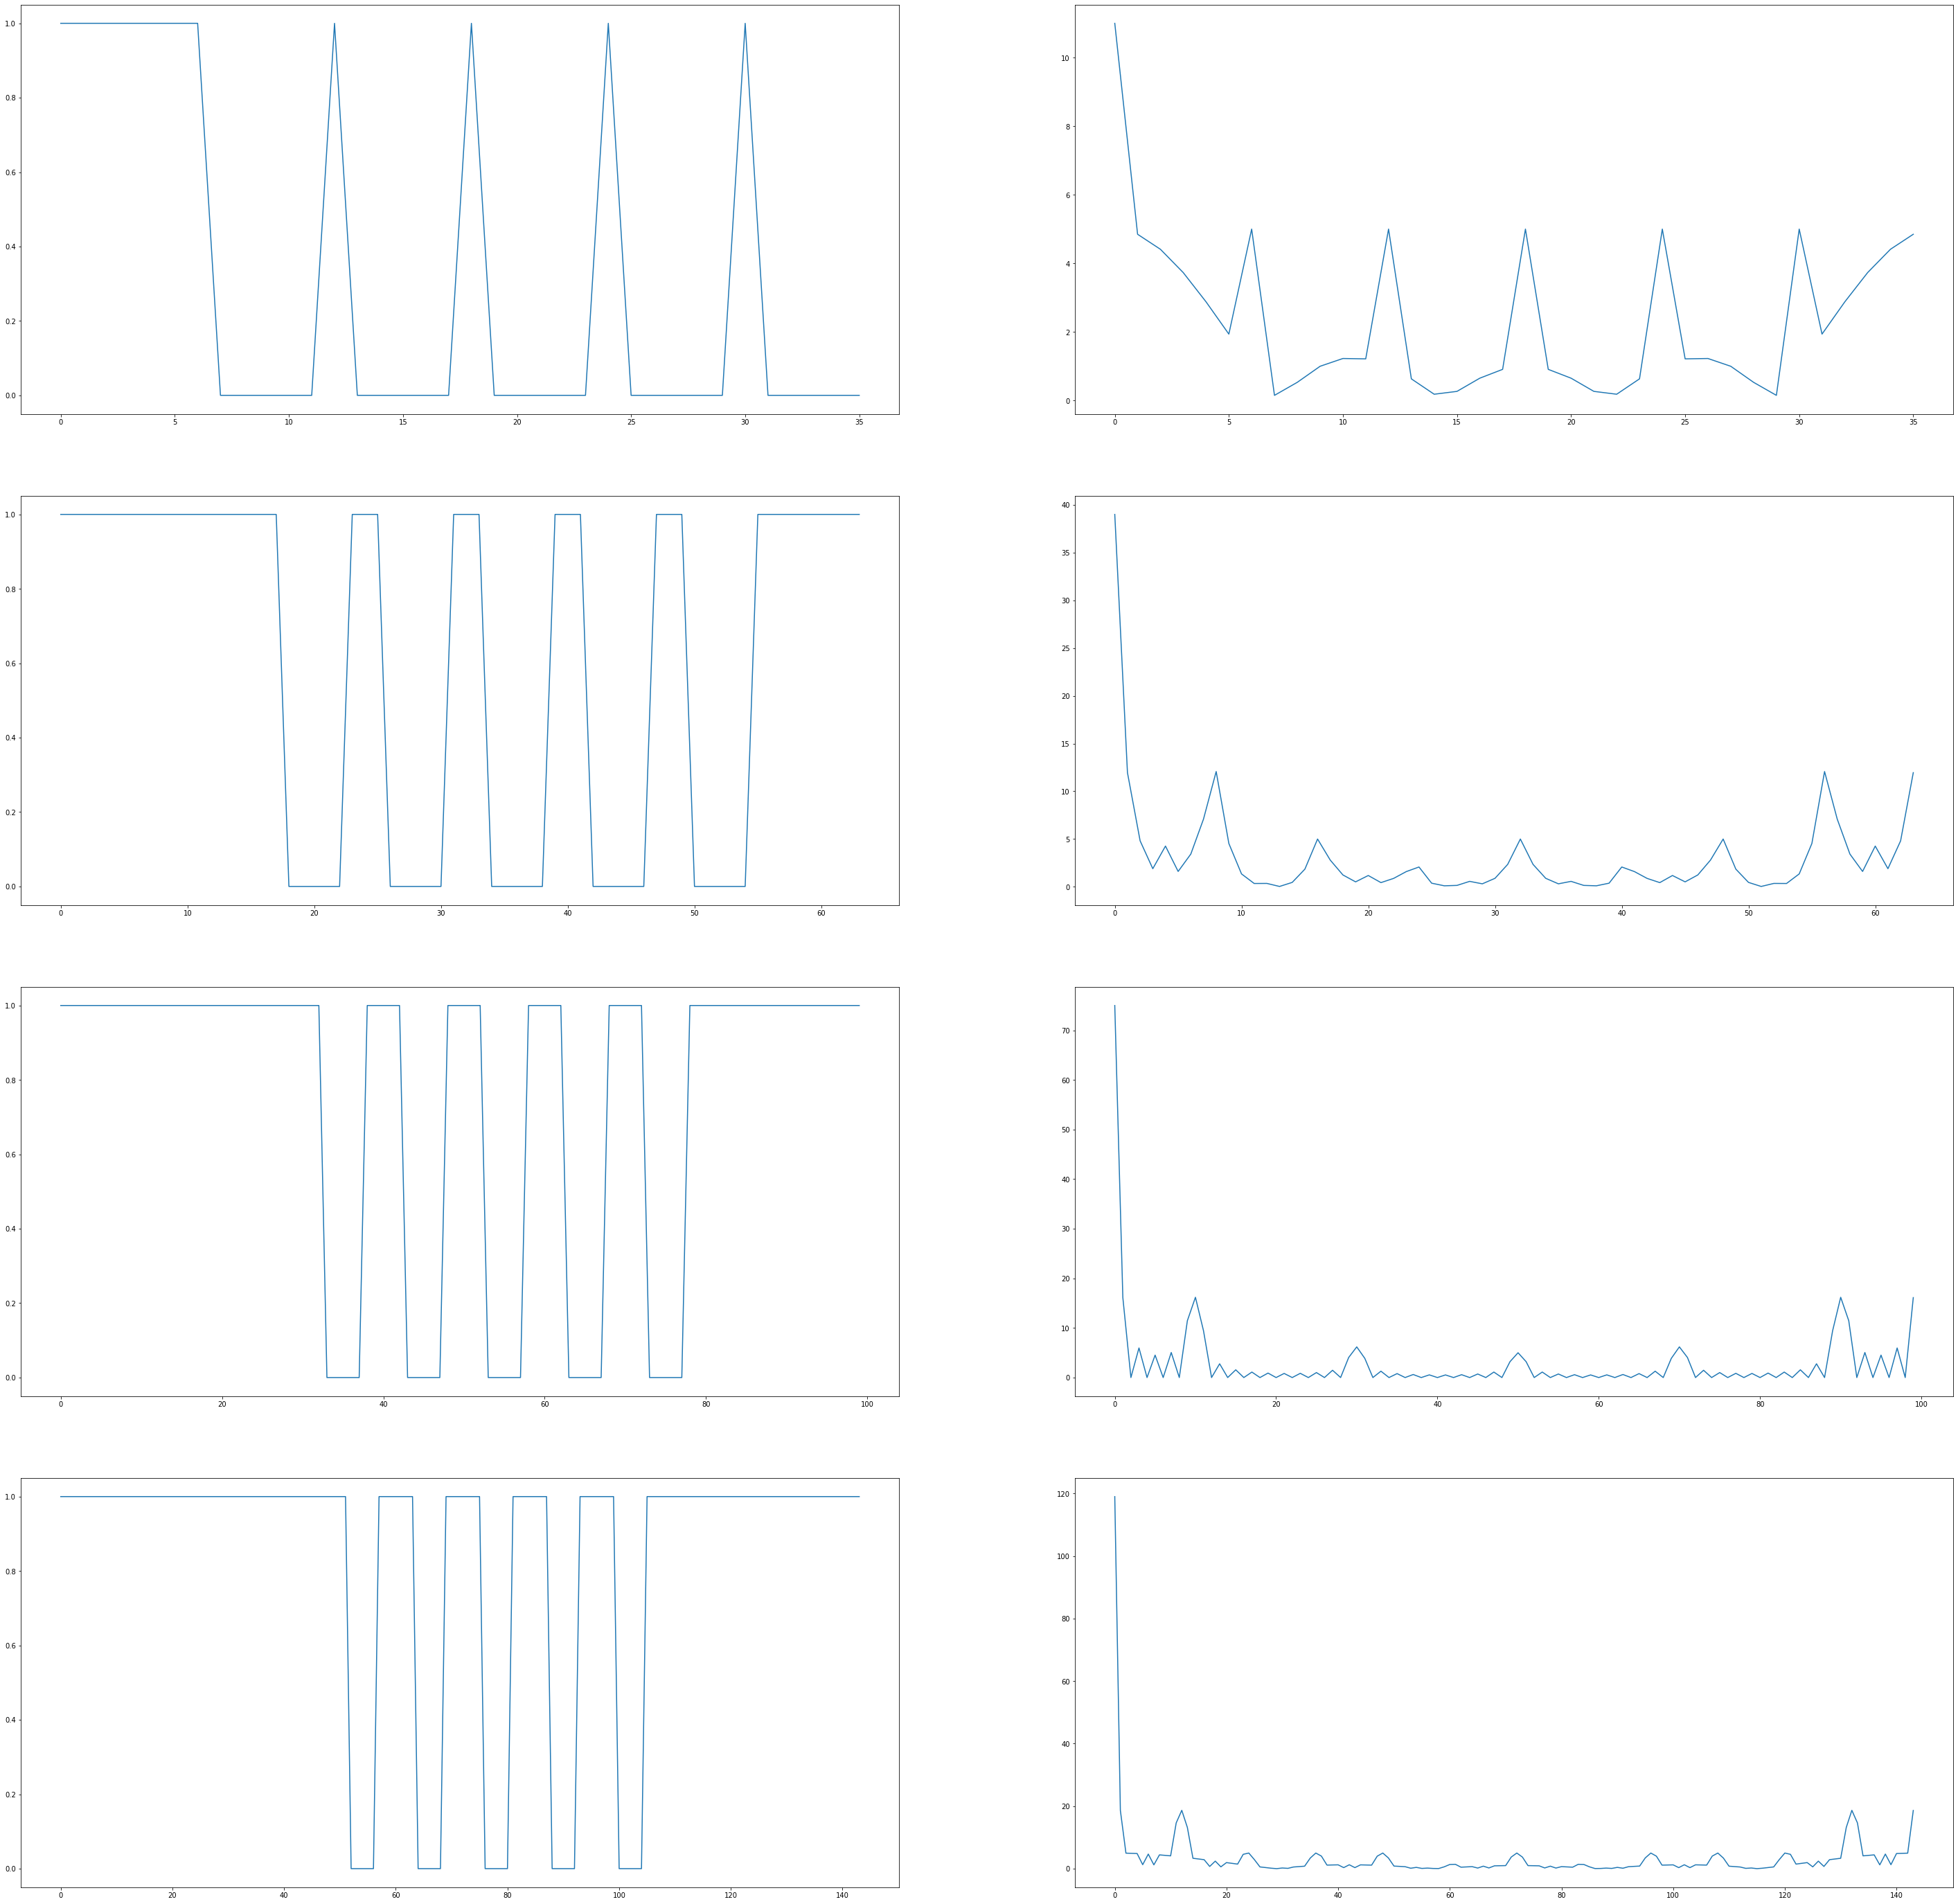

In [11]:
fig,ax =  plt.subplots(4,2,figsize=(50,50))
for a in range(4):
    ax[a][0].plot(range(len(squares_ss[a])), squares_ss[a])
    ax[a][1].plot(range(len(squares_fft_ss[a])), squares_fft_ss[a])